In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import timedelta
import seaborn as sns


In [6]:
reuse = pd.read_csv('1711679324---29-03-2024---02:28:44.reuse.stage2.csv',
  names=["File", "Condition", "Metric", "Value"])
noreuse = pd.read_csv('1711676843---29-03-2024---01:47:23.noreuse.stage2.csv', 
                      names=["File", "Condition", "Metric", "Value"])
print("noreuse"); display(noreuse);
print("reuse"); display(reuse);

noreuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,131383296
1,Init/Prelude.lean,reuse_across_ctor_disabled,time_elapsed_ms,1586
2,Lean/Runtime.lean,reuse_across_ctor_disabled,rss,46759936
3,Lean/Runtime.lean,reuse_across_ctor_disabled,time_elapsed_ms,40
4,Init/Coe.lean,reuse_across_ctor_disabled,rss,53329920
...,...,...,...,...
1695,Lake/CLI/Main.lean,reuse_across_ctor_disabled,time_elapsed_ms,3413
1696,Lake/CLI.lean,reuse_across_ctor_disabled,rss,242434048
1697,Lake/CLI.lean,reuse_across_ctor_disabled,time_elapsed_ms,197
1698,Lake/Main.lean,reuse_across_ctor_disabled,rss,254935040


reuse


,File,Condition,Metric,Value


In [7]:
# Filtering the rows where Metric is 'time_elapsed_ms' and then summing the 'Value' column for both DataFrames
sum_time_elapsed_reuse = reuse[reuse["Metric"] == "time_elapsed_ms"]["Value"].sum()
sum_time_elapsed_no_reuse = noreuse[noreuse["Metric"] == "time_elapsed_ms"]["Value"].sum()

sum_time_elapsed_reuse, sum_time_elapsed_no_reuse

# Ensuring the values are in a compatible format for timedelta
time_reuse = timedelta(milliseconds=int(sum_time_elapsed_reuse))
time_no_reuse = timedelta(milliseconds=int(sum_time_elapsed_no_reuse))

# Formatting as hours:minutes:seconds.milliseconds again
time_format_reuse = str(time_reuse)
time_format_no_reuse = str(time_no_reuse)
print(f"time (reuse): {time_format_reuse} | time (noreuse): {time_format_no_reuse}")

time (reuse): 0:00:00 | time (noreuse): 0:49:36.793000


In [9]:
df_merged = pd.merge(reuse, noreuse, on=["File", "Metric"], suffixes=('_reuse', '_no_reuse'))
display(df_merged)

,File,Condition_reuse,Metric,Value_reuse,Condition_no_reuse,Value_no_reuse
0,Init/Prelude.lean,reuse_across_ctor_enabled,rss,147267584,reuse_across_ctor_disabled,147161088
1,Init/Prelude.lean,reuse_across_ctor_enabled,num_alloc,1321786,reuse_across_ctor_disabled,1321689
2,Init/Prelude.lean,reuse_across_ctor_enabled,num_small_alloc,26538898,reuse_across_ctor_disabled,26538166
3,Init/Prelude.lean,reuse_across_ctor_enabled,num_dealloc,1273534,reuse_across_ctor_disabled,1273439
4,Init/Prelude.lean,reuse_across_ctor_enabled,num_small_dealloc,26157625,reuse_across_ctor_disabled,26156926
...,...,...,...,...,...,...
8495,Lake/Main.lean,reuse_across_ctor_enabled,num_segments,4,reuse_across_ctor_disabled,4
8496,Lake/Main.lean,reuse_across_ctor_enabled,num_pages,3714,reuse_across_ctor_disabled,3715
8497,Lake/Main.lean,reuse_across_ctor_enabled,num_exports,0,reuse_across_ctor_disabled,0
8498,Lake/Main.lean,reuse_across_ctor_enabled,num_recycled_pages,743,reuse_across_ctor_disabled,743


,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/PrettyPrinter/Delaborator/Attributes.lean,231,689,458,66.473149
1,Lean/Meta/Match/MatchPatternAttr.lean,228,678,450,66.371681
2,Lean/Compiler/NeverExtractAttr.lean,234,683,449,65.739385
3,Lean/Elab/Tactic/Conv/Simp.lean,514,1256,742,59.076433
4,Lean/Elab/PreDefinition/MkInhabitant.lean,494,955,461,48.272251
...,...,...,...,...,...
845,Lean/Widget/Basic.lean,688,329,-359,-109.118541
846,Lean/Widget/Types.lean,436,198,-238,-120.202020
847,Lean/Meta/TransparencyMode.lean,508,145,-363,-250.344828
848,Lean/Data/OpenDecl.lean,1340,257,-1083,-421.400778


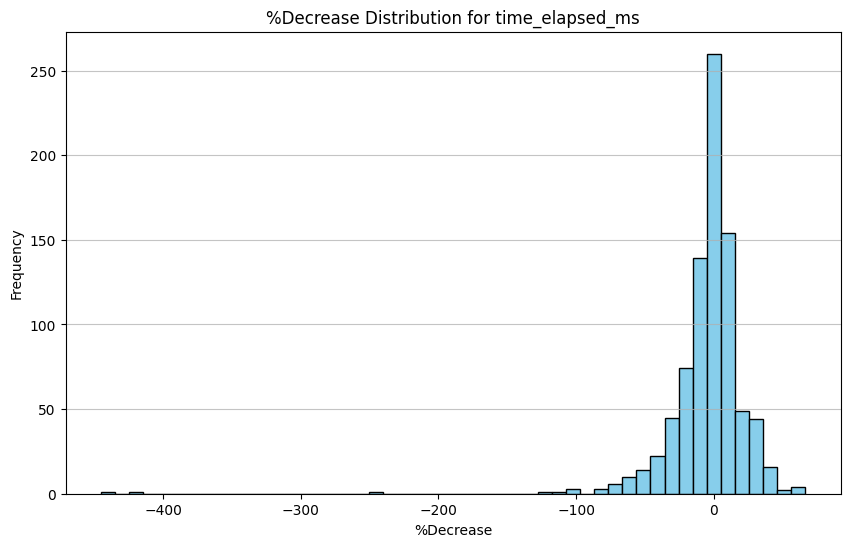

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Data/Array.lean,104898560,106070016,1171456,1.104418
1,Lean/Meta/Match/MatchPatternAttr.lean,161058816,162631680,1572864,0.967133
2,Lean/PrettyPrinter/Delaborator/Options.lean,124108800,125161472,1052672,0.841051
3,Lean/Data/Xml.lean,103178240,103968768,790528,0.760351
4,Init/Data/String.lean,88895488,89554944,659456,0.736370
...,...,...,...,...,...
845,Lean/Elab/Syntax.lean,284065792,280788992,-3276800,-1.166997
846,Init/Guard.lean,106012672,104706048,-1306624,-1.247897
847,Lean/Data/Lsp/Internal.lean,152346624,150392832,-1953792,-1.299126
848,Lean/Elab/BuiltinNotation.lean,306876416,302817280,-4059136,-1.340457


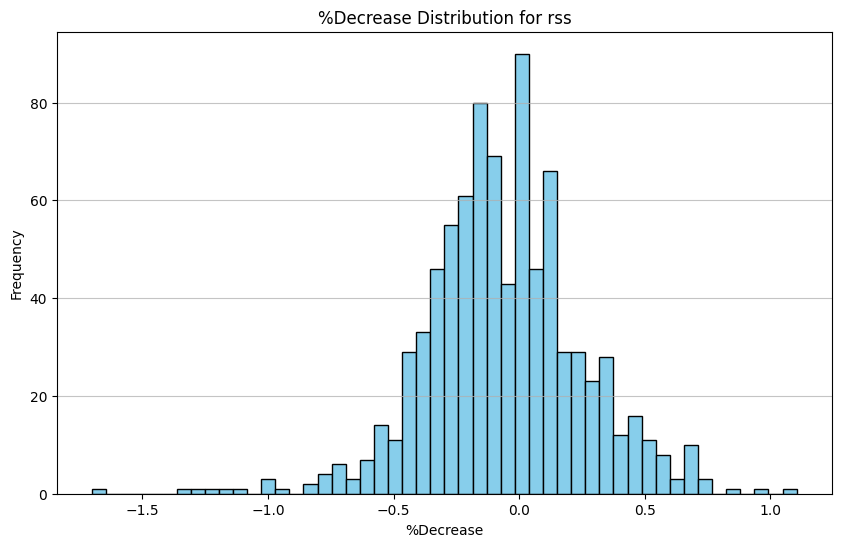

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Meta/CtorRecognizer.lean,3389989,3399868,9879,0.290570
1,Lake/Util/Proc.lean,3255762,3259370,3608,0.110696
2,Lean/Meta/LevelDefEq.lean,8274004,8281354,7350,0.088754
3,Lean/Compiler/LCNF/Simp/Basic.lean,1577726,1578474,748,0.047388
4,Lean/Elab/RecAppSyntax.lean,1040996,1041486,490,0.047048
...,...,...,...,...,...
845,Lean/Server/Rpc/Deriving.lean,18946556,18330798,-615758,-3.359145
846,Lean/Meta/Tactic/Rewrite.lean,6927585,6673298,-254287,-3.810515
847,Lean/Data/Lsp/Internal.lean,8299155,7965526,-333629,-4.188411
848,Lean/Meta/Coe.lean,12094435,11295177,-799258,-7.076100


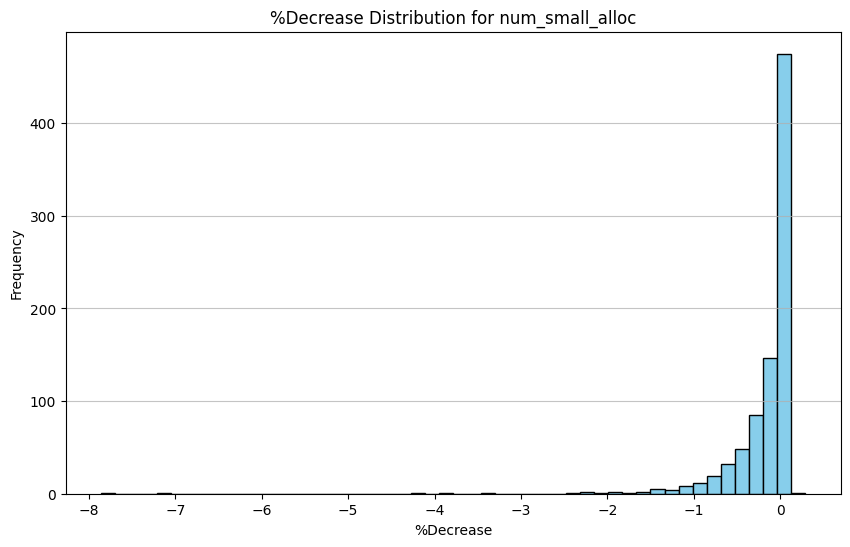

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Meta/CtorRecognizer.lean,138881,139844,963,0.688624
1,Lean/Data/LOption.lean,41913,42005,92,0.219022
2,Lean/Util/FileSetupInfo.lean,48192,48296,104,0.215339
3,Lean/Meta/LevelDefEq.lean,340504,341207,703,0.206033
4,Lean/Server/CompletionItemData.lean,62017,62131,114,0.183483
...,...,...,...,...,...
845,Lean/Data/Lsp/Internal.lean,397898,366489,-31409,-8.570244
846,Lean/Meta/Coe.lean,537971,491859,-46112,-9.375044
847,Lean/Meta/Tactic/Rewrite.lean,284497,258123,-26374,-10.217609
848,Lean/Server/Rpc/Deriving.lean,848615,755644,-92971,-12.303545


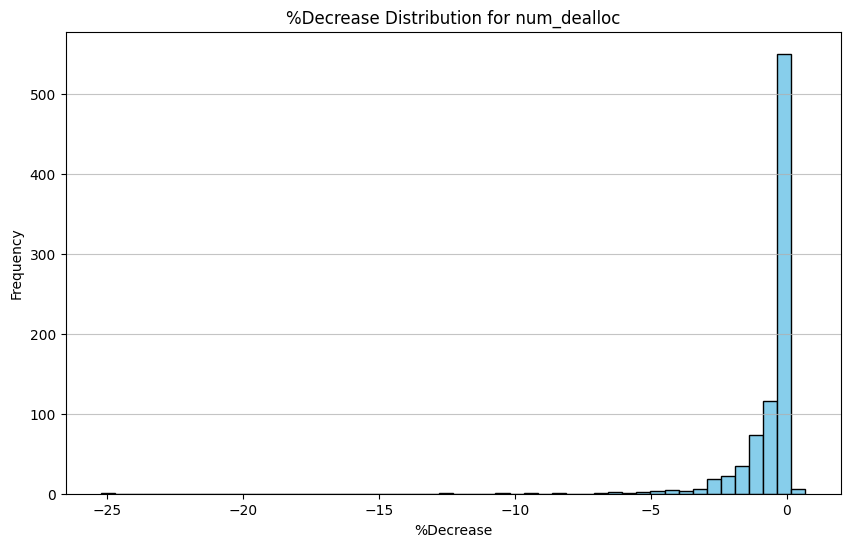

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Meta/CtorRecognizer.lean,2949493,2959032,9539,0.322369
1,Lake/Util/Proc.lean,2872298,2875886,3588,0.124762
2,Lean/Meta/LevelDefEq.lean,7820448,7827522,7074,0.090373
3,Lean/Elab/RecAppSyntax.lean,702661,703112,451,0.064143
4,Lean/Compiler/LCNF/Simp/Basic.lean,1119611,1120307,696,0.062126
...,...,...,...,...,...
845,Lean/Server/Rpc/Deriving.lean,18284184,17689436,-594748,-3.362165
846,Lean/Meta/Tactic/Rewrite.lean,6428636,6182477,-246159,-3.981559
847,Lean/Data/Lsp/Internal.lean,7878257,7552877,-325380,-4.308027
848,Lean/Meta/Coe.lean,11590127,10805955,-784172,-7.256851


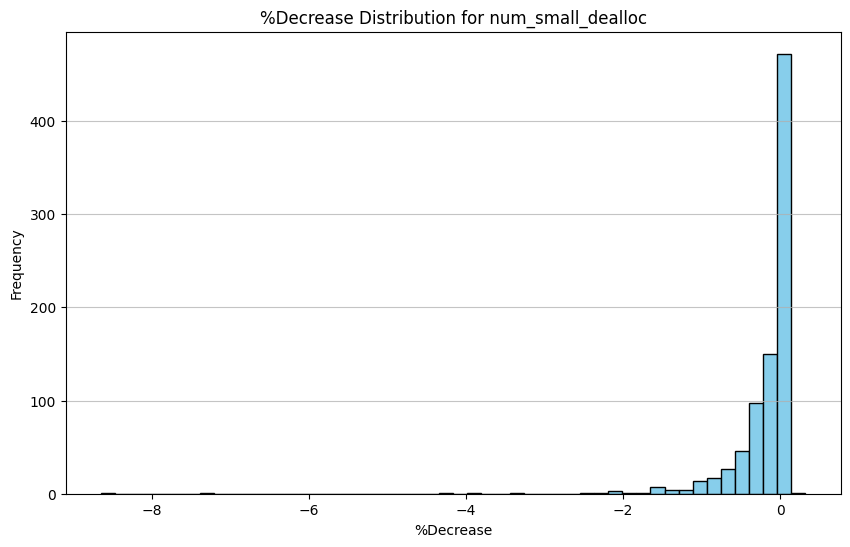

<Axes: >

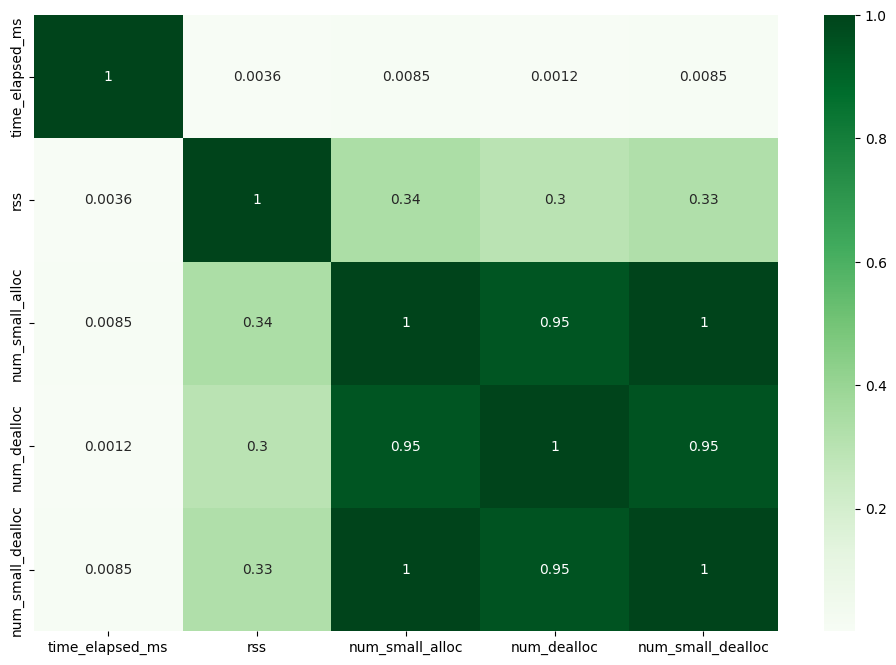

In [10]:
# metrics for which we should compute decreases
df_corr = pd.DataFrame(df_merged["File"].unique(), columns=["File"]) 

for metric in ["time_elapsed_ms", "rss", "num_small_alloc", "num_dealloc", "num_small_dealloc"]:
  display(HTML(f"<h1>{metric}</h1>"))
  df_metric = df_merged[df_merged["Metric"] == metric].copy()
  df_metric["absolute_diff"] = df_merged["Value_no_reuse"] - df_merged["Value_reuse"]
  df_metric["%Decrease"] = (
    100.0 * (df_merged["Value_no_reuse"] - df_merged["Value_reuse"]) / df_merged["Value_no_reuse"]
  )
  df_metric = df_metric.drop(["Condition_reuse", "Condition_no_reuse", "Metric"], axis=1)

  df_kv = df_metric[["File", "%Decrease"]].copy()
  df_kv.rename(columns={"%Decrease": metric}, inplace=True)
  df_corr = pd.merge(df_corr, df_kv, on="File", how="outer")
  
  # Sorting by maximum decrease
  df_metric_sorted = df_metric.sort_values(by="%Decrease", ascending=False)
  df_metric_sorted.reset_index(drop=True, inplace=True) # changes index to start from zero.
  display(df_metric_sorted)
  plt.figure(figsize=(10, 6))
  plt.hist(df_metric_sorted['%Decrease'], bins=50, color='skyblue', edgecolor='black')
  plt.title(f'%Decrease Distribution for {metric}')
  plt.xlabel('%Decrease')
  plt.ylabel('Frequency')
  plt.grid(axis='y', alpha=0.75)
  plt.show()

corr = df_corr.drop('File', axis=1).corr()  # Assuming df_corr is defined and populated
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Greens",annot=True)


,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,28863,4060738
Lean/Elab/Do.lean,24598,6328533
Lean/Meta/ExprDefEq.lean,17166,3470290
Lean/Elab/Tactic/BuiltinTactic.lean,17014,4569685
Lean/Elab/App.lean,16706,4042744
...,...,...
Init/Data/ByteArray.lean,138,55552
Init/Data/Basic.lean,137,60662
Init/Data/Char.lean,121,53141


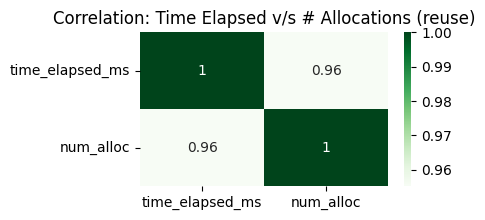

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,31670,4034116
Lean/Elab/Do.lean,24089,6328540
Lean/Elab/Quotation.lean,18582,3926757
Lean/PrettyPrinter/Delaborator/Builtins.lean,16450,5228121
Lean/Elab/App.lean,16111,4005911
...,...,...
Init/Data/Cast.lean,131,48545
Init/Data/ToString.lean,130,57081
Init/Data/Format.lean,129,57273


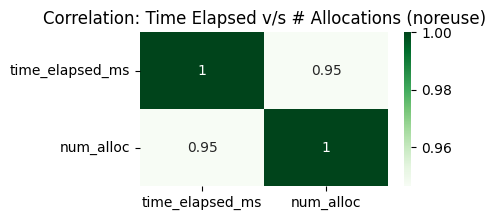

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,31670,4034116
Lean/Elab/Tactic/Omega/Frontend.lean,28863,4060738
Lean/Elab/Do.lean,24598,6328533
Lean/Elab/Do.lean,24089,6328540
Lean/Elab/Quotation.lean,18582,3926757
...,...,...
Init/Data/String.lean,127,55644
Init/Data/Char.lean,122,53141
Init/Data/Char.lean,121,53141


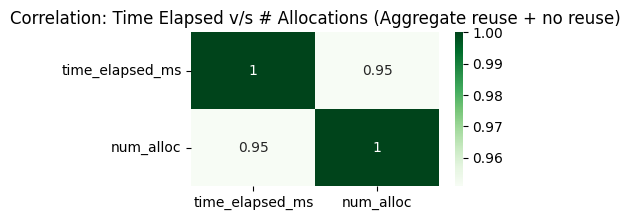

In [11]:
df_full = None

# for each file, grab num alloc and time elapsed.
variant2df = { "reuse" : reuse, "noreuse": noreuse }
for (variant, df) in variant2df.items():
    metric2df = {}
    for metric in ["time_elapsed_ms", "num_alloc"]:
      out = df[df["Metric"] == metric].copy()
      out = out[["File", "Value"]]
      out.rename(columns={"Value" : metric}, inplace=True)
      out = out[["File", metric]].set_index("File")
      metric2df[metric] = out
    
    df_metrics_merged = metric2df["time_elapsed_ms"].join(metric2df["num_alloc"])
    df_metrics_merged = df_metrics_merged.sort_values(by='time_elapsed_ms', ascending=False)

    display(HTML(f"<h3>Correlation: Time elapsed v/s # allocations ({variant})</h3>"))
    display(df_metrics_merged)
    corr = df_metrics_merged.corr()  # Assuming df_corr is defined and populated
    plt.figure(figsize=(4,2))
    sns.heatmap(corr, cmap="Greens",annot=True)
    plt.title(f"Correlation: Time Elapsed v/s # Allocations ({variant})")
    plt.show()

    
    if df_full is None:
        df_full = df_metrics_merged
    else:
        df_full = pd.concat([df_full, df_metrics_merged])

df_full = df_full.sort_values(by='time_elapsed_ms', ascending=False)
display(df_full)
corr = df_full.corr() 
plt.figure(figsize=(4,2))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.title('Correlation: Time Elapsed v/s # Allocations (Aggregate reuse + no reuse)')
plt.show()
